In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import sys
from copy import deepcopy

/Users/apple/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
clustering = pd.read_csv('clustering.csv',header=None)
shape = pd.read_csv('ShapedData.csv',header=None)

In [3]:
#clustering.head()
#shape.head()

In [4]:
data_1=np.array(clustering)
data_2=np.array(shape)

#print("clustering: \n",data_1,"\n\n","shape: \n",data_2)

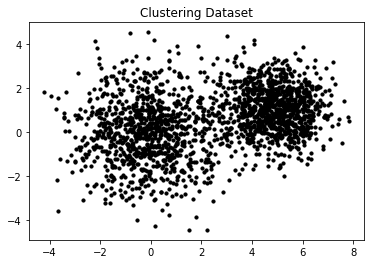

In [73]:
plt.scatter(data_1[:, 0], data_1[:, 1], s=10 ,c='black')
plt.title('Clustering Dataset')
plt.savefig('Clustering Dataset')
plt.show()

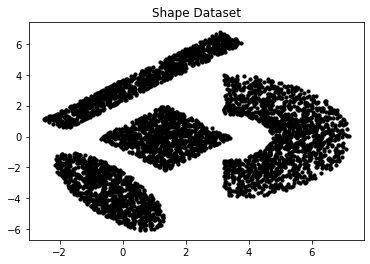

In [74]:
plt.scatter(data_2[:, 0], data_2[:, 1], s=10 ,c='black')
plt.title('Shape Dataset')
plt.savefig('Shape Dataset')
plt.show()

In [5]:
#N,d=data_1.shape
#print("N=",N,"\nd=",d)

In [6]:
#k=4
#center = np.array(random.sample(list(data_1),k))
#print(center)

In [7]:
#index = np.zeros(len(data_1))
#index = np.zeros(data_1.shape)
#index

In [5]:
#def dist(a,b,ord_norm): #ord_norm: none,1,'fro'
#    return np.linalg.norm(a - b, ord=ord_norm)
def dist(a,b): #ord_norm: none,1,'fro'
    return np.linalg.norm(a - b)

### Tol =1e-5

In [70]:
def k_means_tol_1(X,K): # X: d-dimensional obersvation, K: number of clusters
    index = np.zeros(len(X)) # index matrix
    phi = np.zeros(len(X))
    
    tol= 10**(-5) #convergence threshold
    Y = np.array(random.sample(list(X),K)) # randomly select K oberservation from dataset to set as our initial centers
    Y_old = np.zeros(Y.shape) # new centers awaiting assignment
    con = np.linalg.norm(Y-Y_old,ord=1) # 1-norm btw Y and Y_new
    avg_D=0 # Obj value
    colors = ['r', 'g', 'b','y', 'c', 'm','orange','purple'] # color pallete for plotting cluster
    
    while con > tol:
        
        """
        Assign data to the closest center (with label)
        """
        for i in range(len(X)): # for each observation
            min=9999
            for j in range(0,K): # compare distance with each center
                distances = dist(X[i], Y[j])
                if distances < min:
                    min=distances
                    phi[i] = distances # store the distance to the closest center for each observation
                    index[i] = j # store the index (label) for each observation to locate its closest center
        
        Y_old = deepcopy(Y)
        
        """
        Compute cluster mean and assign it as the new center
        """
        for j in range (K):
            group_data_point=[X[i] for i in range (len(index)) if index[i]==j]
            Y[j] = sum(group_data_point)/len(group_data_point)
            con = np.linalg.norm(Y-Y_old,ord=1)
            #print(con)
            
        """
        D (objective value)
        """
        avg_D = sum(phi)/len(phi)
    
    """
    Plot with color by clusters
    """
    for z in range (K):
        data=np.array([X[i] for i in range (len(index)) if index[i]==z])
        plt.scatter(data[:, 0], data[:, 1],s=10, c=colors[z])
        plt.scatter(Y[:, 0], Y[:, 1], marker='*', s=150, c='k')
        plt.title('K-means (tol= 1e-5, D=%f)'%(avg_D))
        plt.savefig('K-means (tol= 1e-5, K=%d, D=%f).png'%(K,avg_D))
        
    plt.show()
        
    return Y,index,avg_D

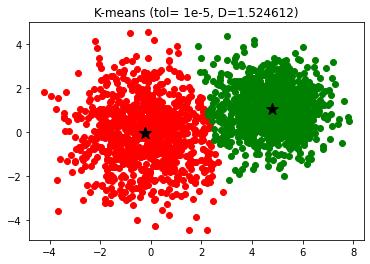

Data:Clustering

 1st center:  [-0.2159331 -0.0629825] 
 2nd center:  [4.80833513 1.05385739] 

C:  [0. 0. 0. ... 1. 1. 1.] 

D:  1.5246115358247088


In [62]:
Y,C,D =k_means_tol_1(data_1,2)
#print("Y: ",Y, "\n\nC: ",C, "\n\nD: ",D)
print("Data:Clustering\n\n","1st center: ",Y[0], "\n 2nd center: ",Y[1],"\n\nC: ",C, "\n\nD: ",D)

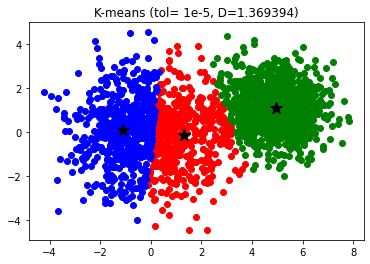

Data:Clustering

 1st center:  [ 1.29632159 -0.15674438] 
 2nd center:  [4.95209869 1.09335196] 

C:  [0. 2. 2. ... 1. 1. 1.] 

D:  1.369394118230233


In [43]:
Y,C,D =k_means_tol_2(data_1,3)
#print("Y: ",Y, "\n\nC: ",C, "\n\nD: ",D)
print("Data:Clustering\n\n","1st center: ",Y[0], "\n 2nd center: ",Y[1],"\n\nC: ",C, "\n\nD: ",D)

## K-means (Data: Clustering, k=1~5, tol_1)

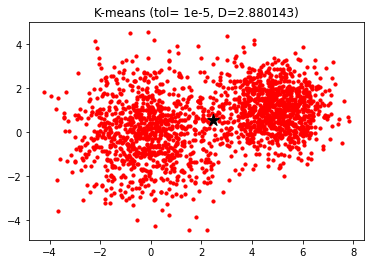

Data:Clustering (k=1)

  centers:

  [[2.44441693 0.52838422]] 

 C: [0. 0. 0. ... 0. 0. 0.] 

 D:  2.880142549691323


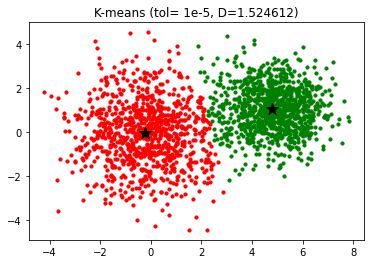

Data:Clustering (k=2)

  centers:

  [[-0.2159331  -0.0629825 ]
 [ 4.80833513  1.05385739]] 

 C: [0. 0. 0. ... 1. 1. 1.] 

 D:  1.5246115358247088


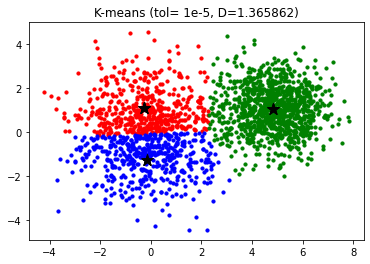

Data:Clustering (k=3)

  centers:

  [[-0.25259373  1.09896645]
 [ 4.825825    1.04521043]
 [-0.14106817 -1.24868102]] 

 C: [2. 2. 0. ... 1. 1. 1.] 

 D:  1.3658620638548107


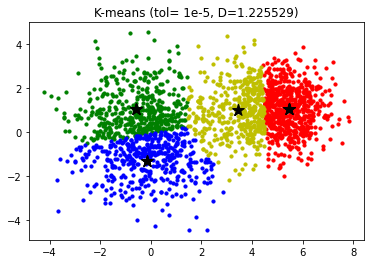

Data:Clustering (k=4)

  centers:

  [[ 5.47443283  1.05226643]
 [-0.58976107  1.04789157]
 [-0.13630645 -1.30372475]
 [ 3.45225033  0.97551474]] 

 C: [2. 2. 1. ... 0. 3. 3.] 

 D:  1.2255291688008012


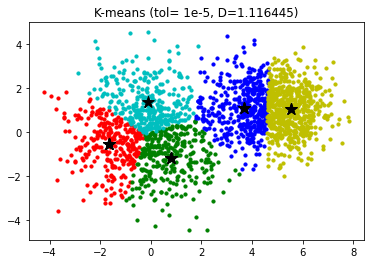

Data:Clustering (k=5)

  centers:

  [[-1.63571338 -0.56098921]
 [ 0.78405923 -1.17619595]
 [ 3.66952087  1.08868157]
 [ 5.53615955  1.0285038 ]
 [-0.10786425  1.3732315 ]] 

 C: [1. 0. 0. ... 3. 2. 2.] 

 D:  1.116444865218539


 store_D:  [2.880142549691323, 1.5246115358247088, 1.3658620638548107, 1.2255291688008012, 1.116444865218539]


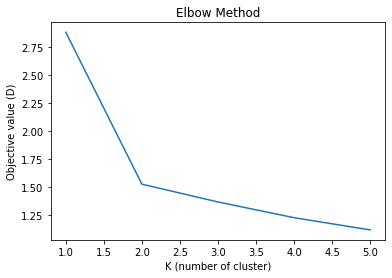

In [71]:
#Formal Anlysis (tol_1)

store_D1=[]
for i in range(1,6):
    Y,C,D =k_means_tol_1(data_1,i)
    #print("Y: ",Y, "\n\nC: ",C, "\n\nD: ",D)
    print("Data:Clustering (k=%d)\n\n "%(i),"centers:\n\n ",Y,"\n\n C:",C, "\n\n D: ",D)
    store_D1.append(D)
print("\n\n store_D: ",store_D1)

x=[1,2,3,4,5]
plt.xlabel('K (number of cluster)')
plt.ylabel('Objective value (D)')
plt.title('Elbow Method') 
plt.plot(x,store_D1)
plt.savefig("Elbow Method (Data: Clustering, tol_1)")
plt.show()

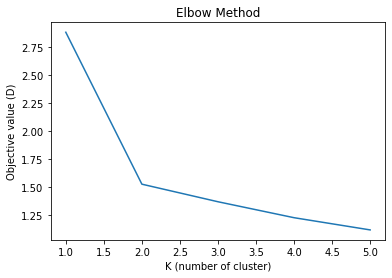

In [19]:
x=[1,2,3,4,5]
plt.xlabel('K (number of cluster)')
plt.ylabel('Objective value (D)')
plt.title('Elbow Method') 
plt.plot(x,store_D1)

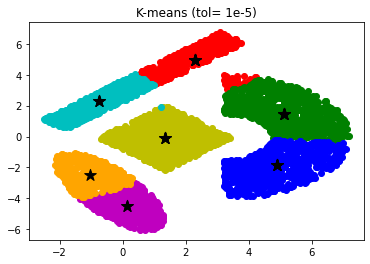

Data:Shape

 1st center:  [2.28532931 4.98457166] 
 2nd center:  [5.10592807 1.48083517] 
 3rd center:  [ 4.88075265 -1.86457129] 

C:  [3. 2. 2. ... 1. 1. 5.] 

D:  1.1058550719415021


In [43]:
Y,C,D =k_means_tol_1(data_2,7)
#print("Y: ",Y, "\n\nC: ",C, "\n\nD: ",D)
print("Data:Shape\n\n","1st center: ",Y[0], "\n 2nd center: ",Y[1],"\n 3rd center: ",Y[2],"\n\nC: ",C, "\n\nD: ",D)

## K-means (Data: Clustering, k=1~5, tol_2)

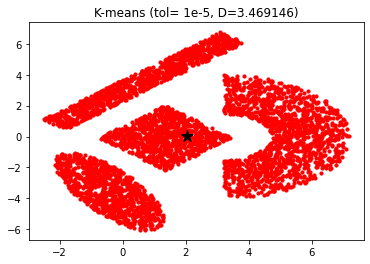

Data:Shape (k=1)

  centers:

  [[2.03627747 0.06476151]] 

 C: [0. 0. 0. ... 0. 0. 0.] 

 D:  3.4691455544220386


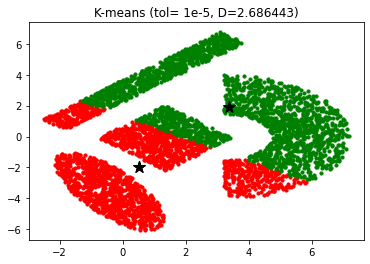

Data:Shape (k=2)

  centers:

  [[ 0.53202036 -1.99986491]
 [ 3.36760224  1.89203443]] 

 C: [0. 1. 0. ... 1. 1. 0.] 

 D:  2.686443007912689


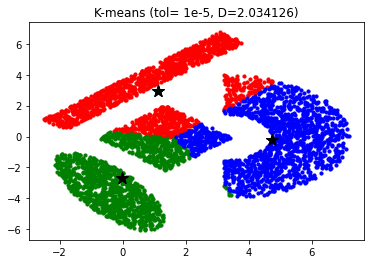

Data:Shape (k=3)

  centers:

  [[ 1.1158781   2.94638044]
 [-0.01660614 -2.69452927]
 [ 4.72410242 -0.25010949]] 

 C: [1. 2. 2. ... 2. 2. 1.] 

 D:  2.0341262549769725


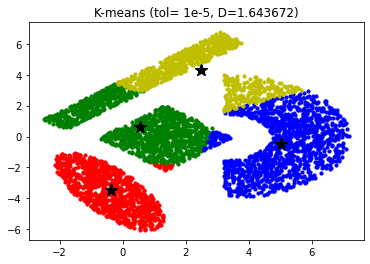

Data:Shape (k=4)

  centers:

  [[-0.38157179 -3.48083101]
 [ 0.55367684  0.62047415]
 [ 5.01488842 -0.45987243]
 [ 2.47124137  4.33174596]] 

 C: [1. 2. 2. ... 2. 2. 0.] 

 D:  1.6436719701590974


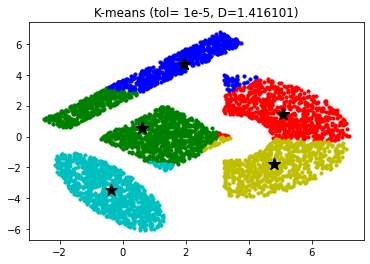

Data:Shape (k=5)

  centers:

  [[ 5.07768529  1.47412081]
 [ 0.60249701  0.56684975]
 [ 1.93811992  4.71284379]
 [ 4.81122732 -1.79960122]
 [-0.38298935 -3.48267037]] 

 C: [1. 3. 3. ... 0. 0. 4.] 

 D:  1.4161012230020047


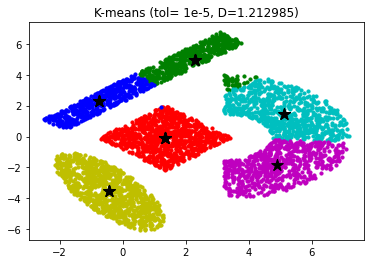

Data:Shape (k=6)

  centers:

  [[ 1.35366772 -0.06444487]
 [ 2.28532931  4.98457166]
 [-0.74026185  2.27485299]
 [-0.43282777 -3.531065  ]
 [ 5.10592807  1.48083517]
 [ 4.88075265 -1.86457129]] 

 C: [0. 5. 5. ... 4. 4. 3.] 

 D:  1.2129849071917729


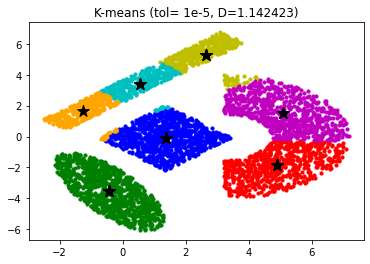

Data:Shape (k=7)

  centers:

  [[ 4.88128592 -1.85966862]
 [-0.43282777 -3.531065  ]
 [ 1.38318444 -0.09305032]
 [ 2.63418     5.30156193]
 [ 0.53782198  3.42072794]
 [ 5.09689265  1.49284143]
 [-1.26477246  1.63140941]] 

 C: [2. 0. 0. ... 5. 5. 1.] 

 D:  1.1424231861803331


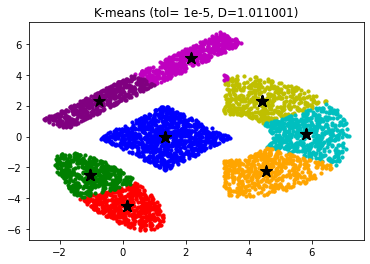

Data:Shape (k=8)

  centers:

  [[ 0.12864448 -4.51907964]
 [-1.03302224 -2.47491142]
 [ 1.35353385 -0.06245563]
 [ 4.40602577  2.31565452]
 [ 5.82568268  0.17297719]
 [ 2.18091815  5.09926319]
 [ 4.54109821 -2.24550137]
 [-0.74646629  2.27201293]] 

 C: [2. 6. 6. ... 3. 3. 0.] 

 D:  1.011000852113584


 store_D:  [2.880142549691323, 1.5246115358247088, 1.3658620638548107, 1.2255291688008012, 1.116444865218539]


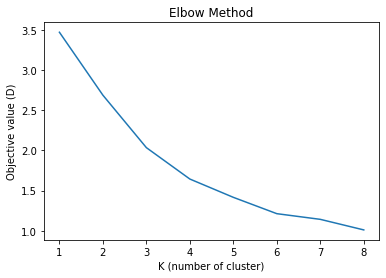

In [72]:
store_D2=[]
for i in range(1,9):
    Y,C,D =k_means_tol_1(data_2,i)
    #print("Y: ",Y, "\n\nC: ",C, "\n\nD: ",D)
    print("Data:Shape (k=%d)\n\n "%(i),"centers:\n\n ",Y,"\n\n C:",C, "\n\n D: ",D)
    store_D2.append(D)
print("\n\n store_D: ",store_D2)

x=[1,2,3,4,5,6,7,8]
plt.xlabel('K (number of cluster)')
plt.ylabel('Objective value (D)')
plt.title('Elbow Method') 
plt.plot(x,store_D2)
plt.savefig("Elbow Method (Data: Shape, tol_2)")

plt.show()

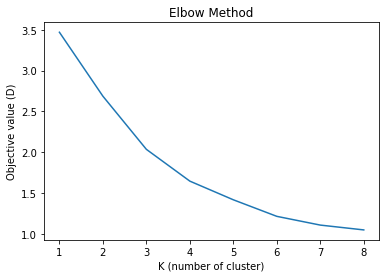

In [23]:
x=[1,2,3,4,5,6,7,8]
plt.xlabel('K (number of cluster)')
plt.ylabel('Objective value (D)')
plt.title('Elbow Method') 
plt.plot(x,store_D2)

 ### Tol= [1e-7,1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]

In [24]:
def k_means_tol_2(X,K): # X: d-dimensional obersvation, K: number of clusters
    
    TOL=[1e-7,1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
    AVG_D=[]
    for a in TOL:
        index = np.zeros(len(X)) # index matrix
        phi = np.zeros(len(X)) # distance

        tol= a #convergence threshold
        Y = np.array(random.sample(list(X),K)) # randomly select K oberservation from dataset to set as our initial centers
        Y_old = np.zeros(Y.shape) # new centers awaiting assignment
        con = np.linalg.norm(Y-Y_old,ord=1) # 1-norm btw Y and Y_new
        avg_D=0 # Obj value
        colors = ['r', 'g', 'b','y', 'c', 'm','orange','purple'] # color pallete for plotting cluster

        while con > tol:

            """
            Assign data to the closest center (with label)
            """
            for i in range(len(X)):
                min=9999
                for j in range(0,K):
                    distances = dist(X[i], Y[j])
                    if distances < min:
                        min=distances
                        phi[i] = distances
                        index[i] = j

            Y_old = deepcopy(Y)

            """
            Compute cluster mean and assign it as the new center
            """
            for j in range (K):
                group_data_point=[X[i] for i in range (len(index)) if index[i]==j]
                Y[j] = sum(group_data_point)/len(group_data_point)
                con = np.linalg.norm(Y-Y_old,ord=1)
                #print(con)

            """
            D (objective value)
            """
            avg_D = sum(phi)/len(phi)

        """
        Plot with color by clusters
        
        for z in range (K):
            data=np.array([X[i] for i in range (len(index)) if index[i]==z])
            plt.scatter(data[:, 0], data[:, 1], c=colors[z])
            plt.scatter(Y[:, 0], Y[:, 1], marker='*', s=150, c='k')
            plt.title('K-means (tol= 1e-5, D=%f)'%(avg_D))
            plt.savefig('K-means (tol= 1e-5, K=%d, D=%f).png'%(K,avg_D))
            
        plt.show()
        """
        AVG_D.append(avg_D)
        
    return Y,index,AVG_D

Clustering (k=2)

[1.52461154 1.52461154 1.52461154 1.52461154 1.52461154 1.52466954
 1.52411308 1.61902098]


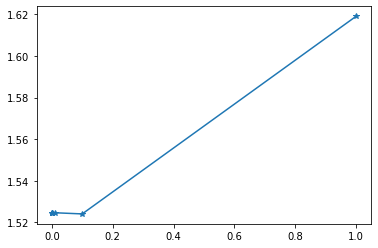

In [25]:
k=2
x=[1e-7,1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
Y,C,D1 =k_means_tol_2(data_1,k)
print(np.array(D1))
plt.plot(x,D1,marker='*')
plt.savefig('Diff Tol (Clustering)')

Shape (k=5)

[1.44305531 1.41585188 1.41610122 1.44313099 1.44313099 1.41603939
 1.44023423 1.58695835]


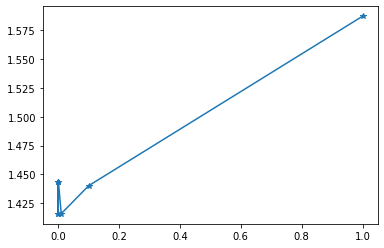

In [26]:
k=5
x=[1e-7,1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
Y,C,D2 =k_means_tol_2(data_2,k)
print(np.array(D2))
plt.plot(x,D2,marker='*')
plt.savefig('Diff Tol (Shape)')

In [12]:
"""
K=2
plt.scatter(data_1[:,0],data_1[:,1],c='b')

for i in range(K):

    plt.scatter(Y[i][0],Y[i][1],c='r')
                
plt.show()
"""

"\nK=2\nplt.scatter(data_1[:,0],data_1[:,1],c='b')\n\nfor i in range(K):\n\n    plt.scatter(Y[i][0],Y[i][1],c='r')\n                \nplt.show()\n"

In [13]:
"""
Y = np.array(random.sample(list(data_1),4))
#Y_old = np.zeros(Y.shape)
print(Y,"\n\n")
index = np.zeros(len(data_1))
for i in range(len(data_1)):
        min=9999
        for j in range(0,4):
            distances = dist(data_1[i], Y[j])
            if distances < min:
                min=distances
                index[i] = j
print(index,len(index))
for j in range (0,4):
    group_data_point=[data_1[i] for i in range (len(index)) if index[i]==j]
    print(group_data_point[:5],"\n",len(group_data_point),"\n\n")
    Y[j] = sum(group_data_point)/len(group_data_point)
print(Y)


"""

'\nY = np.array(random.sample(list(data_1),4))\n#Y_old = np.zeros(Y.shape)\nprint(Y,"\n\n")\nindex = np.zeros(len(data_1))\nfor i in range(len(data_1)):\n        min=9999\n        for j in range(0,4):\n            distances = dist(data_1[i], Y[j])\n            if distances < min:\n                min=distances\n                index[i] = j\nprint(index,len(index))\nfor j in range (0,4):\n    group_data_point=[data_1[i] for i in range (len(index)) if index[i]==j]\n    print(group_data_point[:5],"\n",len(group_data_point),"\n\n")\n    Y[j] = sum(group_data_point)/len(group_data_point)\nprint(Y)\n\n\n'

In [14]:
"""
def k_means_tol_1(X,K): # X: d-dimensional obersvation, K: number of clusters
    index = np.zeros(len(X)) # index matrix
    phi = np.zeros(len(X))
    
    tol= 10**(-5) #convergence threshold
    Y = np.array(random.sample(list(X),K)) # randomly select K oberservation from dataset to set as our initial centers
    Y_old = np.zeros(Y.shape) # new centers awaiting assignment
    con = np.linalg.norm(Y-Y_old,ord=1) # 1-norm btw Y and Y_new
    avg_D=0
    
    while con > tol:
        
        #Assign data to the closest center (with label)
        for i in range(len(X)):
            min=9999
            for j in range(0,K):
                distances = dist(X[i], Y[j])
                if distances < min:
                    min=distances
                    phi[i] = distances
                    index[i] = j
        
        Y_old = deepcopy(Y)
        
        # Compute cluster mean and assign it as the new center
        for j in range (K):
            group_data_point=[X[i] for i in range (len(index)) if index[i]==j]
            Y[j] = sum(group_data_point)/len(group_data_point)
            con = np.linalg.norm(Y-Y_old,ord=1)
        
        # D (objective value)
        avg_D = sum(phi)/len(phi)
    
    
        
    return Y,index,avg_D
"""

'\ndef k_means_tol_1(X,K): # X: d-dimensional obersvation, K: number of clusters\n    index = np.zeros(len(X)) # index matrix\n    phi = np.zeros(len(X))\n    \n    tol= 10**(-5) #convergence threshold\n    Y = np.array(random.sample(list(X),K)) # randomly select K oberservation from dataset to set as our initial centers\n    Y_old = np.zeros(Y.shape) # new centers awaiting assignment\n    con = np.linalg.norm(Y-Y_old,ord=1) # 1-norm btw Y and Y_new\n    avg_D=0\n    \n    while con > tol:\n        \n        #Assign data to the closest center (with label)\n        for i in range(len(X)):\n            min=9999\n            for j in range(0,K):\n                distances = dist(X[i], Y[j])\n                if distances < min:\n                    min=distances\n                    phi[i] = distances\n                    index[i] = j\n        \n        Y_old = deepcopy(Y)\n        \n        # Compute cluster mean and assign it as the new center\n        for j in range (K):\n            gr

In [15]:
"""
#plt.scatter(data_1[:,0],data_1[:,1],c='b')

colors = ['r', 'g', 'b',  'y', 'c', 'm']
K=2
for j in range (len(index)):
    a=int(index[j])
    plt.scatter(data_1[j][0],data_1[j][1],c=colors[a])

for i in range(K):
    plt.scatter(Y[i][0],Y[i][1],c=colors[i])
                
plt.show()
"""

"\n#plt.scatter(data_1[:,0],data_1[:,1],c='b')\n\ncolors = ['r', 'g', 'b',  'y', 'c', 'm']\nK=2\nfor j in range (len(index)):\n    a=int(index[j])\n    plt.scatter(data_1[j][0],data_1[j][1],c=colors[a])\n\nfor i in range(K):\n    plt.scatter(Y[i][0],Y[i][1],c=colors[i])\n                \nplt.show()\n"

In [16]:
#data_1[0]

In [17]:
#Y

In [18]:
"""
#Plot
colors = ['r', 'g', 'b',  'y', 'c', 'm']
for i in range(len(C)):
    points = np.array([data_1[j] for j in range(len(C)) if C[j] == i])
    plt.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    plt.scatter(Y[:, 0], Y[:, 1], marker='*', s=200, c='#050505')
    
plt.show()
"""

"\n#Plot\ncolors = ['r', 'g', 'b',  'y', 'c', 'm']\nfor i in range(len(C)):\n    points = np.array([data_1[j] for j in range(len(C)) if C[j] == i])\n    plt.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])\n    plt.scatter(Y[:, 0], Y[:, 1], marker='*', s=200, c='#050505')\n    \nplt.show()\n"

In [19]:
"""
a=np.array([0,1])
b=np.array([1,2])
c=np.array([2,3])
d=[a,b,c]
e=sum(d)
e
"""
#"""
#a=[1,2,3,4,5]
#avg=sum(a)/len(a)
#print(avg)
#"""

'\na=np.array([0,1])\nb=np.array([1,2])\nc=np.array([2,3])\nd=[a,b,c]\ne=sum(d)\ne\n'

In [9]:
Test= np.array([
    [-1.449, -0.727],
 [ 5.652,  0.75],
 [ 1.144, -0.971],
 [ 4.033,  1.408],
 [-0.129,  1.389]
               ] )

In [10]:
Test2= np.array([
    [-1.449, -0.727],
 [ 5.652,  0.75],
 [ 1.144, -0.971],
 [ 4.033,  1.408],
 [-0.129,  1.389]
               ] )

In [11]:
TT = Test2-Test

In [12]:
TT

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [14]:
TT2=np.linalg.norm(Test2-Test,ord=1)
TT2

0.0